# Single-layer Perceptron Demo

## Hand-written digit classification with single-layer perceptron

In this demo, we will show how to use single-layer perceptron for hand-written digit classification. We will use MNIST as the dataset and build a single-layer perceptron. 

In [6]:
import torch
import torchvision

Set random seed

In [7]:
random_seed = 9999
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

Load the dataset using Pytorch API. First we load the training set. The training set contains 60000 images and the test set contains 10000 images. 

In [8]:
batch_size_train = 64
batch_size_test = 1000


trainset = torchvision.datasets.MNIST('./', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

print (len(trainset))

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size_train, shuffle=True)

60000


In [9]:
testset = torchvision.datasets.MNIST('./', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ]))

print (len(testset))

test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size_test, shuffle=True)

10000


Let's show some example images.

In [10]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

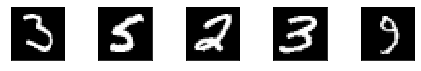

In [11]:
import matplotlib.pyplot as plt

fig = plt.figure()

for i in range(5):
  plt.subplot(1,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

In [12]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

Let's build a single-layer perceptron With Pytorch, we can use nn.Linear to construct one fully-connected layer.

In [13]:
class SLP(nn.Module):
    def __init__(self):
        super(SLP, self).__init__()
        self.fc1 = nn.Linear(784, 10)

    def forward(self, x):
        x = x.view(x.size(0), -1)
        x = self.fc1(x)

        return F.log_softmax(x)

In [14]:
network = SLP()

print (network)

SLP(
  (fc1): Linear(in_features=784, out_features=10, bias=True)
)


For training the network, we need to specify the optimizer. 

In [15]:
n_epochs = 10
learning_rate = 0.01
momentum = 0.9
log_interval = 10

optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)


In [16]:
train_losses = []
test_losses = []

In [17]:
def train(epoch):
  network.train()
   
  train_loss = 0

  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    
    output = network(data)
    loss = F.nll_loss(output, target)
    
    train_loss += loss.item()
    
    loss.backward()
    
    optimizer.step()
    
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
    
  
  train_loss /= len(train_loader.dataset)
  train_losses.append(train_loss)
        

In [18]:
def test():
  network.eval()

  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)

  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

In [19]:
for epoch in range(1, n_epochs + 1):
  
  train(epoch)
  test()

/usr/local/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


Train Epoch: 1 [0/60000 (0%)]	Loss: 2.371927
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.950957
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.621171
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.517256
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.377511
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.270965
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.411616
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.516832
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.221167
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.634753
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.288512
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.743134
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.454767
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.368022
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.445334
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.705600
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.155121
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.325756
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.407378
Train Epoch: 1 [12160/60000 (20%)]	Loss: 0.278202
Train Epoch: 1 [12800/60000 (

/Users/yunhui.guo/.local/lib/python3.6/site-packages/torch/nn/_reduction.py:42: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.2975, Accuracy: 9168/10000 (92%)

Train Epoch: 2 [0/60000 (0%)]	Loss: 0.328479
Train Epoch: 2 [640/60000 (1%)]	Loss: 0.185679
Train Epoch: 2 [1280/60000 (2%)]	Loss: 0.199018
Train Epoch: 2 [1920/60000 (3%)]	Loss: 0.175905
Train Epoch: 2 [2560/60000 (4%)]	Loss: 0.194434
Train Epoch: 2 [3200/60000 (5%)]	Loss: 0.256664
Train Epoch: 2 [3840/60000 (6%)]	Loss: 0.298762
Train Epoch: 2 [4480/60000 (7%)]	Loss: 0.306421
Train Epoch: 2 [5120/60000 (9%)]	Loss: 0.339928
Train Epoch: 2 [5760/60000 (10%)]	Loss: 0.370670
Train Epoch: 2 [6400/60000 (11%)]	Loss: 0.237032
Train Epoch: 2 [7040/60000 (12%)]	Loss: 0.249052
Train Epoch: 2 [7680/60000 (13%)]	Loss: 0.229336
Train Epoch: 2 [8320/60000 (14%)]	Loss: 0.244482
Train Epoch: 2 [8960/60000 (15%)]	Loss: 0.462189
Train Epoch: 2 [9600/60000 (16%)]	Loss: 0.253406
Train Epoch: 2 [10240/60000 (17%)]	Loss: 0.114009
Train Epoch: 2 [10880/60000 (18%)]	Loss: 0.447618
Train Epoch: 2 [11520/60000 (19%)]	Loss: 0.278281
Train Epoch: 2 [12160

Train Epoch: 3 [44160/60000 (74%)]	Loss: 0.396832
Train Epoch: 3 [44800/60000 (75%)]	Loss: 0.494096
Train Epoch: 3 [45440/60000 (76%)]	Loss: 0.249208
Train Epoch: 3 [46080/60000 (77%)]	Loss: 0.402332
Train Epoch: 3 [46720/60000 (78%)]	Loss: 0.120111
Train Epoch: 3 [47360/60000 (79%)]	Loss: 0.153164
Train Epoch: 3 [48000/60000 (80%)]	Loss: 0.499972
Train Epoch: 3 [48640/60000 (81%)]	Loss: 0.505379
Train Epoch: 3 [49280/60000 (82%)]	Loss: 0.239145
Train Epoch: 3 [49920/60000 (83%)]	Loss: 0.503950
Train Epoch: 3 [50560/60000 (84%)]	Loss: 0.334602
Train Epoch: 3 [51200/60000 (85%)]	Loss: 0.230572
Train Epoch: 3 [51840/60000 (86%)]	Loss: 0.235243
Train Epoch: 3 [52480/60000 (87%)]	Loss: 0.256618
Train Epoch: 3 [53120/60000 (88%)]	Loss: 0.170759
Train Epoch: 3 [53760/60000 (90%)]	Loss: 0.256494
Train Epoch: 3 [54400/60000 (91%)]	Loss: 0.179507
Train Epoch: 3 [55040/60000 (92%)]	Loss: 0.245169
Train Epoch: 3 [55680/60000 (93%)]	Loss: 0.317535
Train Epoch: 3 [56320/60000 (94%)]	Loss: 0.403283


Train Epoch: 5 [28800/60000 (48%)]	Loss: 0.342276
Train Epoch: 5 [29440/60000 (49%)]	Loss: 0.328392
Train Epoch: 5 [30080/60000 (50%)]	Loss: 0.161274
Train Epoch: 5 [30720/60000 (51%)]	Loss: 0.152726
Train Epoch: 5 [31360/60000 (52%)]	Loss: 0.255858
Train Epoch: 5 [32000/60000 (53%)]	Loss: 0.484618
Train Epoch: 5 [32640/60000 (54%)]	Loss: 0.550561
Train Epoch: 5 [33280/60000 (55%)]	Loss: 0.279930
Train Epoch: 5 [33920/60000 (57%)]	Loss: 0.198227
Train Epoch: 5 [34560/60000 (58%)]	Loss: 0.260355
Train Epoch: 5 [35200/60000 (59%)]	Loss: 0.331112
Train Epoch: 5 [35840/60000 (60%)]	Loss: 0.253040
Train Epoch: 5 [36480/60000 (61%)]	Loss: 0.175776
Train Epoch: 5 [37120/60000 (62%)]	Loss: 0.305123
Train Epoch: 5 [37760/60000 (63%)]	Loss: 0.170347
Train Epoch: 5 [38400/60000 (64%)]	Loss: 0.172111
Train Epoch: 5 [39040/60000 (65%)]	Loss: 0.188757
Train Epoch: 5 [39680/60000 (66%)]	Loss: 0.181922
Train Epoch: 5 [40320/60000 (67%)]	Loss: 0.346082
Train Epoch: 5 [40960/60000 (68%)]	Loss: 0.385594


Train Epoch: 7 [12800/60000 (21%)]	Loss: 0.358114
Train Epoch: 7 [13440/60000 (22%)]	Loss: 0.570680
Train Epoch: 7 [14080/60000 (23%)]	Loss: 0.170161
Train Epoch: 7 [14720/60000 (25%)]	Loss: 0.174116
Train Epoch: 7 [15360/60000 (26%)]	Loss: 0.156341
Train Epoch: 7 [16000/60000 (27%)]	Loss: 0.409457
Train Epoch: 7 [16640/60000 (28%)]	Loss: 0.667586
Train Epoch: 7 [17280/60000 (29%)]	Loss: 0.112270
Train Epoch: 7 [17920/60000 (30%)]	Loss: 0.055875
Train Epoch: 7 [18560/60000 (31%)]	Loss: 0.302569
Train Epoch: 7 [19200/60000 (32%)]	Loss: 0.352787
Train Epoch: 7 [19840/60000 (33%)]	Loss: 0.229075
Train Epoch: 7 [20480/60000 (34%)]	Loss: 0.148720
Train Epoch: 7 [21120/60000 (35%)]	Loss: 0.287969
Train Epoch: 7 [21760/60000 (36%)]	Loss: 0.251461
Train Epoch: 7 [22400/60000 (37%)]	Loss: 0.242021
Train Epoch: 7 [23040/60000 (38%)]	Loss: 0.191270
Train Epoch: 7 [23680/60000 (39%)]	Loss: 0.338086
Train Epoch: 7 [24320/60000 (41%)]	Loss: 0.305600
Train Epoch: 7 [24960/60000 (42%)]	Loss: 0.282112


Train Epoch: 8 [58240/60000 (97%)]	Loss: 0.185374
Train Epoch: 8 [58880/60000 (98%)]	Loss: 0.345368
Train Epoch: 8 [59520/60000 (99%)]	Loss: 0.501104

Test set: Avg. loss: 0.3018, Accuracy: 9121/10000 (91%)

Train Epoch: 9 [0/60000 (0%)]	Loss: 0.306298
Train Epoch: 9 [640/60000 (1%)]	Loss: 0.163202
Train Epoch: 9 [1280/60000 (2%)]	Loss: 0.214661
Train Epoch: 9 [1920/60000 (3%)]	Loss: 0.329615
Train Epoch: 9 [2560/60000 (4%)]	Loss: 0.144277
Train Epoch: 9 [3200/60000 (5%)]	Loss: 0.250707
Train Epoch: 9 [3840/60000 (6%)]	Loss: 0.129525
Train Epoch: 9 [4480/60000 (7%)]	Loss: 0.149520
Train Epoch: 9 [5120/60000 (9%)]	Loss: 0.401944
Train Epoch: 9 [5760/60000 (10%)]	Loss: 0.197084
Train Epoch: 9 [6400/60000 (11%)]	Loss: 0.172227
Train Epoch: 9 [7040/60000 (12%)]	Loss: 0.644778
Train Epoch: 9 [7680/60000 (13%)]	Loss: 0.241277
Train Epoch: 9 [8320/60000 (14%)]	Loss: 0.162113
Train Epoch: 9 [8960/60000 (15%)]	Loss: 0.347867
Train Epoch: 9 [9600/60000 (16%)]	Loss: 0.257464
Train Epoch: 9 [10240

Train Epoch: 10 [42240/60000 (70%)]	Loss: 0.391476
Train Epoch: 10 [42880/60000 (71%)]	Loss: 0.188278
Train Epoch: 10 [43520/60000 (72%)]	Loss: 0.215247
Train Epoch: 10 [44160/60000 (74%)]	Loss: 0.264396
Train Epoch: 10 [44800/60000 (75%)]	Loss: 0.407886
Train Epoch: 10 [45440/60000 (76%)]	Loss: 0.380222
Train Epoch: 10 [46080/60000 (77%)]	Loss: 0.315006
Train Epoch: 10 [46720/60000 (78%)]	Loss: 0.609584
Train Epoch: 10 [47360/60000 (79%)]	Loss: 0.378667
Train Epoch: 10 [48000/60000 (80%)]	Loss: 0.204500
Train Epoch: 10 [48640/60000 (81%)]	Loss: 0.165561
Train Epoch: 10 [49280/60000 (82%)]	Loss: 0.435450
Train Epoch: 10 [49920/60000 (83%)]	Loss: 0.207189
Train Epoch: 10 [50560/60000 (84%)]	Loss: 0.266754
Train Epoch: 10 [51200/60000 (85%)]	Loss: 0.448375
Train Epoch: 10 [51840/60000 (86%)]	Loss: 0.126711
Train Epoch: 10 [52480/60000 (87%)]	Loss: 0.412059
Train Epoch: 10 [53120/60000 (88%)]	Loss: 0.329292
Train Epoch: 10 [53760/60000 (90%)]	Loss: 0.165055
Train Epoch: 10 [54400/60000 (9

Text(0, 0.5, 'negative log likelihood loss')

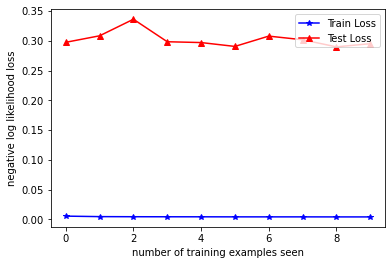

In [20]:
fig = plt.figure()
plt.plot(train_losses, "-*", color='blue')
plt.plot(test_losses, "-^", color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [21]:
with torch.no_grad():
  output = network(example_data)

/usr/local/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


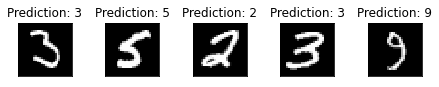

In [28]:
fig = plt.figure()
for i in range(5):
  plt.subplot(1,5,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Prediction: {}".format(
    output.data.max(1, keepdim=True)[1][i].item()))
  plt.xticks([])
  plt.yticks([])


Let's show some examples that the network make wrong predictons.

/usr/local/anaconda3/envs/env_pytorch/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  # Remove the CWD from sys.path while we load stuff.


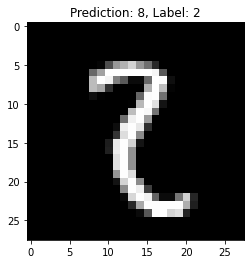

In [42]:
fig = plt.figure()
plt.tight_layout()

for data, target in test_loader:
      output = network(data)
      pred = output.data.max(1, keepdim=True)[1].numpy()
      
      cnt = len(pred)
      for i in range(cnt):
            if pred[i].item() != target[i].item():
                
                plt.imshow(data[i][0], cmap='gray', interpolation='none')
                plt.title("Prediction: {}, Label: {}".format(pred[i].item(), target[i].item()))
                break
      break

plt.show()